## Differential equation for a pendulum

In [ ]:
# Let's start with simple things
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### From the 2-nd order equation to a system of 1-st order equations

The differential equation that describes a pendulum evolution is the following

$$\frac{d^{2} \alpha}{d t^{2}}+\frac{g}{L} \sin \alpha=0$$

Here we assume a friction-less case for simplicity. It is the second-order equation that can be transformed into a system of two first-order equations by introducing new variable that corresponds to the angular speed

$$\beta = \frac{d \alpha}{dt}$$

So we get the following mathematical expression:

$$ \begin{cases} \frac{d \alpha}{dt} = \beta \\ \frac{d \beta}{dt} = -\frac{g}{L} \sin \alpha\end{cases}$$

Solving this system we get $\alpha(t)$ and that describes the evolution of the angle over the time. From this dependence we can get the estimate of the diameter of oscillations of a pendulum under given initial conditions.

In [ ]:
# The same system of differential equations can be written as a 
# function of \alpha, \beta, time and some parameters that 
# returns vector of derivatives for \alpha and \beta

In [ ]:
def derivatives(X, t, b):
    '''
    compute derivatives of X wrt time
    '''
    alpha, beta = X
    dxdt = [beta, -b*np.sin(alpha)]
    return dxdt

In [ ]:
# Setting parameters, b here corresponds to g/L value
b = 5.0

In [ ]:
# And initial conditions
x0 = [0.0, 2.0]

In [ ]:
# Setting timespan for the pendulum evolution
tspan = np.linspace(0, 10, 101)

In [ ]:
# Solving our ODE system
solution = odeint(derivatives, x0, tspan, args=(b,)) # returns an 2-dimensional array with 
                        # the first index specifying the time
                        # and the second index specifying the 
                        # component of the state (X) vector

In [ ]:
solution[:10, :]

### Let's examine the solution now

In [ ]:
def plot_solution_xt(t, solution, b, y0):
    plt.figure(figsize=(6,4), dpi=100)
    plt.plot(t, solution[:, 0], 'b', label='$\\alpha(t)$')
    plt.plot(t, solution[:, 1], 'g', label='$\\beta(t)$')
    plt.title("Pendulum evolution, init={}, b={}".format(y0, b))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

In [ ]:
plot_solution_xt(tspan, solution, b, x0)

In [ ]:
def plot_solution_xy(dfunc, solution, args):
    xx, yy = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20))


    U, V = np.zeros(xx.shape), np.zeros(yy.shape)

    NI, NJ = xx.shape

    # U, V = pend(xx, t, b, c) vectorize sometime
    for i in range(NI):
        for j in range(NJ):
            a = xx[i, j]
            b = yy[i, j]
            xprime = dfunc([a, b], None, *args)
            U[i,j] = xprime[0]
            V[i,j] = xprime[1]


    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N 
    
    plt.figure(figsize=(6,4), dpi=100)
    plt.quiver(xx, yy, U2, V2, color='lightgray', label='direction field')

    plt.plot(solution[:,0], solution[:,1], 'b-', label='path') # path
    plt.plot([solution[0,0]], [solution[0,1]], 'o', label='start') # start
    plt.plot([solution[-1,0]], [solution[-1,1]], 's', label='end') # end

    plt.xlabel("$\\alpha $")
    plt.ylabel('$\\beta $')
    plt.legend(loc="upper left")
    plt.ylim([-3, 3])
    plt.xlim([-3, 3])

In [ ]:
plot_solution_xy(derivatives, solution, (b,))

### Task
    Estimate the amplitude of oscillations of 1 meter-long pendulum that starts from [0, 1.0] (angle, speed)
    on Earth-surface level (normal gravity)

In [ ]:
# TODO: change parameter b above accordingly and solve the ODE system numericaly 
# from the solution find the minimum and the maximum deviation and compute the amplitude as 0.5*(max-min)
max_a = np.max(solution[:,0])
min_a = np.min(solution[:,0])
amplitude = 0.5 * (max_a - min_a)
print (amplitude)


## Differential equation of planet motion

Planet motion around the sun is defined by Newton's gravity equation:
$$ \vec{F}=-\frac{G M m}{r^{3}} \vec{r} $$

where $\vec{r}$ goes from the sun to the planet.

or for 2D case it would be 

$$
\begin{array}{l}
\frac{d^{2} x}{d t^{2}}=-\frac{G M}{r^{3}} x \\
\frac{d^{2} y}{d t^{2}}=-\frac{G M}{r^{3}} y
\end{array}
$$

Going to the 1st order equitaions by introducing speed: $v_x = \frac{dx}{dt}, v_y = \frac{dy}{dt}$, we get
$$
\begin{cases}
\frac{dx}{dt} = v_x \\
\frac{dy}{dt} = v_y \\
\frac{d v_x}{d t}=-\frac{G M}{r^{3}} x \\
\frac{d v_y}{d t}=-\frac{G M}{r^{3}} y
\end{cases}
$$

Before going to calculation we also make a note about measurement units. In astronomy we the length is usually measured in so called astronomical units, which equals to the biggest axis of Earth orbit (about $1.49 \times 10^{11} m$), time is measured in earth years, mass is measured in solar masses.

In [ ]:
def derivatives_planet(X, t):
    dxdt = np.zeros(4)
    dxdt[0] = X[2] # vx
    dxdt[1] = X[3] # vy
    r = np.sqrt(X[0]**2 + X[1]**2)
    dxdt[2] = -(G*M*X[0])/r**3
    dxdt[3] = -(G*M*X[1])/r**3
    return dxdt

In [ ]:
G = 4 * np.pi**2 # Gravitational constant for astronomical units
M = 1.0      # mass of the central mass (in solar masses)

x0 = 1.0      # initial x coordinate in AU 
vy0 = 6.283   # initial y speed in AU per year

In [ ]:
## Set initial conditions
X0_earth = [ x0, 0, 0, vy0]

In [ ]:
tspan = np.linspace(0, 1, 100)  # create time array of 100 points for 3 years

## Solve the ODE with odeint
solution_earth = odeint(derivatives_planet, X0_earth, tspan) 

In [ ]:
def plot_solution_xt(t, X):
    plt.figure(figsize=(7,3), dpi=100)
    plt.plot(t, X[:,0])
    plt.xlabel('t')
    plt.ylabel('x')

In [ ]:
plot_solution_xt(tspan, solution_earth)

In [ ]:
def plot_solution_orbit(X, X0, dfunc):
    xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
    U, V = np.zeros(xx.shape), np.zeros(yy.shape)
    NI, NJ = xx.shape

    # U, V = pend(xx, t, b, c) vectorize sometime, calculate vector field
    for i in range(NI):
        for j in range(NJ):
            x = xx[i, j]
            y = yy[i, j]
            xprime = dfunc([x, y, 0, 0], None)
            U[i,j] = xprime[2]
            V[i,j] = xprime[3]
    
    N = np.sqrt(U**2 + V**2)/4
    U2, V2 = U/N, V/N 
    
    # Plot the orbit
    plt.figure(figsize=(7,4), dpi=100)
    plt.quiver(xx, yy, U2, V2, color='lightgray', label='vector field (for zero speed)')

    plt.title(r'Using odeint with $x$ = %g, $v_y$ = %g' % (X0[0], X0[3]))
    plt.plot(X[:, 0], X[:, 1], label="Planet orbit")
    plt.xlim(np.min(X[:, 0])*1.9, np.max(X[:, 0])*1.5)
    plt.ylim(np.min(X[:, 1])*1.9, np.max(X[:, 1])*1.5)
    plt.legend(loc='upper right')
    plt.plot(0, 0, 'ko')

In [ ]:
plot_solution_orbit(solution_earth, X0_earth, derivatives_planet)

From the solution trajectory above we can compute the orbit eccentricity. For eliptical shapes it is defined by the formula:

$$ e=\sqrt{1-\frac{b^{2}}{a^{2}}} $$

where $a$ and $b$ are the large and small semi-axes correspondingly.

### Task
    Calculate the eccentricity of Earth orbit.



In [ ]:
# TODO: compute big and small semi-axis
def calc_ecc(solution):
    a = # YOUR CODE HERE
    b = # YOUR CODE HERE
    if a > b: 
        e = np.sqrt(1 - b**2 / a**2)
    else:
        e = np.sqrt(1 - a**2 / b**2)
    print ("Axis: {}, {}, delta: {}, eccentricity: {:.4f}".format(a, b , a-b, e))

In [ ]:
calc_ecc(solution_earth)

## Bonus. Towards the outer space
Ceres is a solar system planet discovered in 1801 by Giuseppe Piazzi, Palermo observatory. It is the central planetoid of the asteroid belt between Mars and Jupyter. According to NASA studies, there is plenty of ice and even a tenuous water atmosphere [wiki](https://en.wikipedia.org/wiki/Ceres_(dwarf_planet)). Carl Friedrich Gauss was 24 when he managed to estimate the parameters of Ceres orbit by just three observations, which made him famous across Europe. The average radius of 2.765 of AU. The smaller semi-axis equals to 2.559. The speed is 3.778 AU per year.
If you are a fan of the Expanse TV Series, you'd also appreciate this task, since Ceres is the central site of the Belters population.

Fans of the Expanse TV Series would appreciate this task since Ceres is the central site of the Belters population of TV Series universe ([more details](https://expanse.fandom.com/wiki/Ceres)).
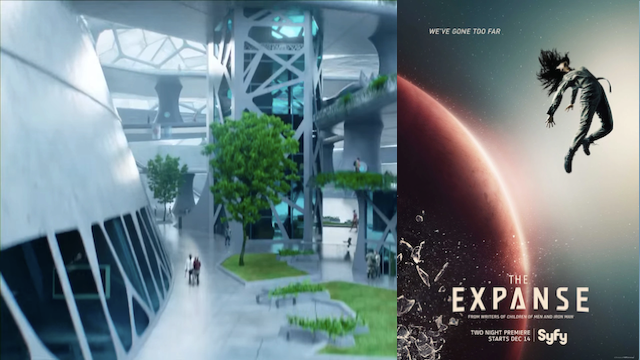
Pictures are taken from https://expanse.fandom.com/wiki/Ceres.

The goal of this task is to estimate the Ceres' orbital eccentricity.

In [ ]:
x0 = ...        # TODO set initial x coordinate in AU, Ceres orbit smaller semi-axis
vy0 = ...      # TODO set initial y speed in AU per year, Ceres orbital speed

In [ ]:
## Set initial conditions and define needed array.
X0_ceres = [ x0, 0, 0, vy0]
tspan_ceres = np.linspace(0, 5, 100)

In [ ]:
solution_ceres = odeint(derivatives_planet, X0_ceres, tspan_ceres) # returns an 2-dimensional array with 


In [ ]:
plot_solution_xt(tspan_ceres, solution_ceres)

In [ ]:
plot_solution_orbit(solution_ceres, X0_ceres, derivatives_planet)

### What is the eccentricity of Ceres orbit?

In [ ]:
# TODO apply the same function to the orbit of Ceres

In [ ]:
calc_ecc(solution_ceres)